In [1]:
import torch
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('datasets/bike-sharing-demand/train.csv')

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.shape

(10886, 12)

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')

In [6]:
data['yr'] = data['datetime'].apply(lambda x: x.year)
data['mnth'] = data['datetime'].apply(lambda x: x.month)

EDA

In [7]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yr,mnth
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


Text(0.5, 1.0, 'Number of bikes rented per season')

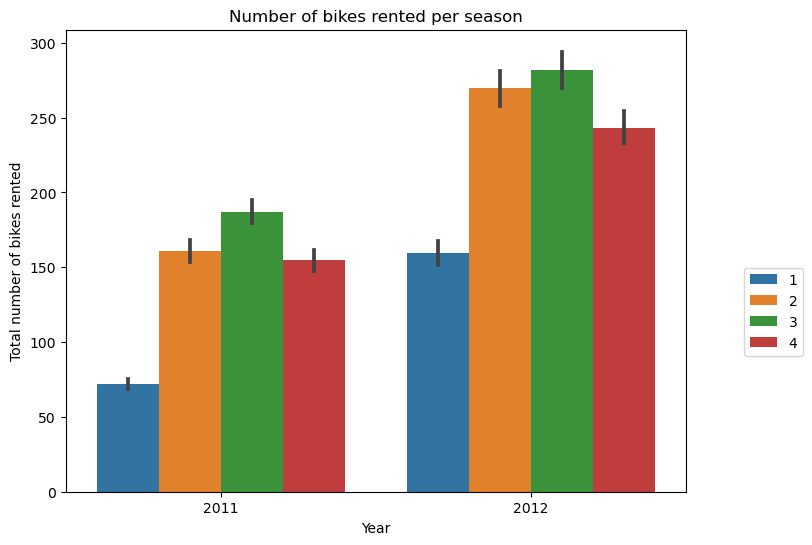

In [8]:
plt.figure(figsize=(8, 6))

sns.barplot(data, x='yr', y='count', hue='season', estimator='mean')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))

plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')

plt.title('Number of bikes rented per season')

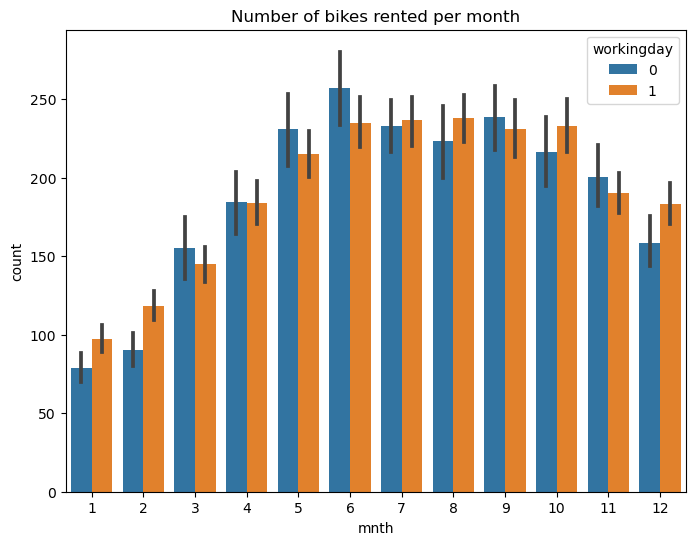

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(data, x='mnth', y='count', hue='workingday', estimator='mean')
plt.title('Number of bikes rented per month')
plt.show()

Text(0, 0.5, 'Total number of bikes rented')

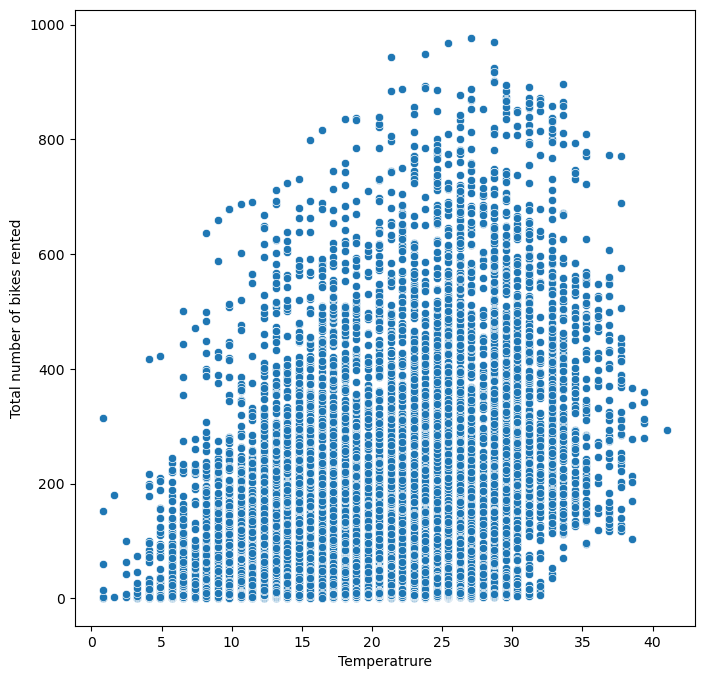

In [10]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data, x='temp', y='count')
plt.xlabel('Temperatrure')
plt.ylabel('Total number of bikes rented')

In [11]:
data['weather'].describe()

count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64

Preprocess Data

In [12]:
data = pd.get_dummies(data, columns=['season', 'weather'])

In [13]:
data.sample(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,yr,mnth,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
6636,2012-03-13 19:00:00,0,1,26.24,31.060,47,15.0013,50,429,479,2012,3,1,0,0,0,1,0,0,0
2004,2011-05-10 10:00:00,0,1,22.96,26.515,37,6.0032,27,100,127,2011,5,0,1,0,0,0,1,0,0
455,2011-02-02 01:00:00,0,1,9.02,11.365,93,12.9980,0,3,3,2011,2,1,0,0,0,0,0,1,0
2554,2011-06-14 08:00:00,0,1,23.78,27.275,49,26.0027,45,441,486,2011,6,0,1,0,0,1,0,0,0
4601,2011-11-04 19:00:00,0,1,16.40,20.455,37,23.9994,14,182,196,2011,11,0,0,0,1,1,0,0,0


In [14]:
data.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'yr', 'mnth', 'season_1',
       'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [15]:
columns = ['holiday', 'workingday', 'temp', 'atemp', 'humidity',
    'windspeed', 'yr', 'mnth', 'season_1', 'season_2', 'season_3',
    'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'
]

features = data[columns]

In [16]:
target = data[['count']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2
)

In [19]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [20]:
X_train_tensor.shape

torch.Size([8708, 16])

In [21]:
y_train_tensor.shape

torch.Size([8708, 1])

In [22]:
X_test_tensor.shape

torch.Size([2178, 16])

In [23]:
y_test_tensor.shape

torch.Size([2178, 1])

In [24]:
import torch.utils.data as data_utils

In [25]:
train_data = data_utils.TensorDataset(X_train_tensor, y_train_tensor)

In [26]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [27]:
len(train_loader)

88

In [28]:
iter(train_loader)

In [29]:
features_batch, target_batch = next(iter(train_loader))

In [30]:
features_batch.shape

torch.Size([100, 16])

In [31]:
inp = X_train_tensor.shape[1]
out = 1
hid = 10
loss_fn = torch.nn.MSELoss()

In [32]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),
    torch.nn.Linear(hid, out)
)

In [33]:
model

Sequential(
  (0): Linear(in_features=16, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [35]:
total_step = len(train_loader)
num_epochs = 10000
for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 2000 == 0 and i+1 == total_step:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss {loss.item():.4f}')

Epoch [1/10000], Loss 96844.1094
Epoch [2001/10000], Loss 55697.2891
Epoch [4001/10000], Loss 51913.0000
Epoch [6001/10000], Loss 51733.8359
Epoch [8001/10000], Loss 35267.7812
Epoch [10001/10000], Loss 35000.4922


In [36]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

In [37]:
sample = X_test.iloc[45]
sample

holiday          0.0000
workingday       0.0000
temp            22.1400
atemp           25.7600
humidity        94.0000
windspeed       11.0014
yr            2011.0000
mnth             5.0000
season_1         0.0000
season_2         1.0000
season_3         0.0000
season_4         0.0000
weather_1        0.0000
weather_2        0.0000
weather_3        1.0000
weather_4        0.0000
Name: 2112, dtype: float64

In [38]:
sample_tensor = torch.tensor(sample.values, dtype=torch.float)
sample_tensor

tensor([0.0000e+00, 0.0000e+00, 2.2140e+01, 2.5760e+01, 9.4000e+01, 1.1001e+01,
        2.0110e+03, 5.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00])

In [39]:
with torch.no_grad():
    y_pred = model(sample_tensor)

print(f'Prediction count : {y_pred.item()}')
print(f'Actual count : {y_test.iloc[45]}')

Prediction count : 95.5848388671875
Actual count : count    26
Name: 2112, dtype: int64


In [40]:
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

In [41]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(2178, 1)

In [42]:
y_test.shape

(2178, 1)

In [43]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
96,165,219.340378
88,13,174.043716
1513,397,330.410339
984,258,107.013435
371,76,-39.478912
964,6,162.238525
1767,337,381.459869
1618,151,202.219467
833,22,205.414413
485,69,83.971283


In [46]:
sklearn.metrics.r2_score(y_test, y_pred)

0.261213312842687

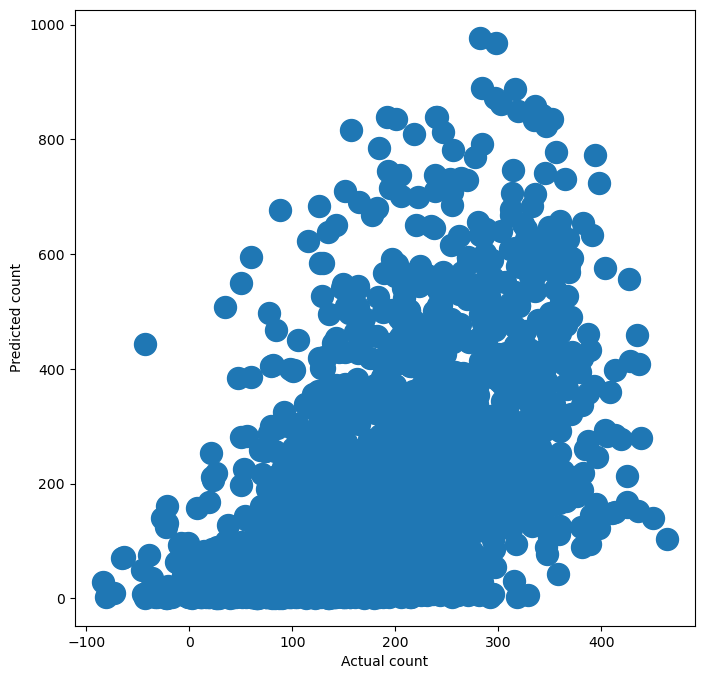

In [47]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test.values, s=250)
plt.xlabel('Actual count')
plt.ylabel('Predicted count')
plt.show()